First. I'll handle all the imports here

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', 100)

## Load data

Read the Excel files. These are unmodified files from [Outscraper](https://outscraper.com/)'s scraped output. They contain Google reviews for leasing companies, apartment complexes, and student housing for three different campustowns.

- Brigham Young University (Provo, UT)
- Penn State University (University Park, PA)
- University of Illinois at Urbana Champaign (Champaign, IL)

In [ ]:
df_byu_b = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/byu-businesses.csv')
df_byu_r = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/byu-reviews.csv')
df_psu_b = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/psu-businesses.csv')
df_psu_r = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/psu-reviews.csv')
df_uiuc_b = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/uiuc-businesses.csv')
df_uiuc_r = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/uiuc-reviews.csv')

In [ ]:
display(df_byu_b.head(2))
display(df_byu_r.head(2))
display(df_psu_b.head(2))
display(df_psu_r.head(2))
display(df_uiuc_b.head(2))
display(df_uiuc_r.head(2))

,query,name,site,type,subtypes,category,phone,full_address,borough,street,city,postal_code,state,us_state,country,country_code,latitude,longitude,time_zone,plus_code,area_service,rating,reviews,reviews_link,reviews_tags,reviews_per_score,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,photo,street_view,located_in,working_hours,working_hours_old_format,other_hours,popular_times,business_status,about,range,posts,logo,description,typical_time_spent,verified,owner_id,owner_title,owner_link,reservation_links,booking_appointment_link,menu_link,order_links,location_link,place_id,google_id,cid,reviews_id,located_google_id
0,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,https://myalpinevillage.com/,Student housing center,"Student housing center, Apartment building, Ap...",Student housing center,+1 801-623-6093,"1378 Freedom Blvd 200 W, Provo, UT 84604, Unit...",Carterville,1378 Freedom Blvd 200 W,Provo,84604,Utah,Utah,United States of America,US,40.252607,-111.661247,America/Denver,85GC783Q+2G,False,2.9,481,https://search.google.com/local/reviews?placei...,"apartment, utilities, fees, checks, contract, ...",NaN,200,33,31,72,145,126,https://lh5.googleusercontent.com/p/AF1QipPYc7...,https://lh5.googleusercontent.com/p/AF1QipOf2I...,NaN,"{""Monday"": ""10AM-6PM"", ""Tuesday"": ""10AM-6PM"", ...",Monday:10AM-6PM|Tuesday:10AM-6PM|Wednesday:10A...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair-accessible car ...",NaN,NaN,https://lh5.googleusercontent.com/-hH8E8pq9CkI...,Welcome to our accommodating student housing a...,NaN,True,106402413364201152471,Alpine Village,https://www.google.com/maps/contrib/1064024133...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/Alpine+Villa...,ChIJqyXyo6GQTYcRXGfgeIpqc_I,0x874d90a1a3f225ab:0xf2736a8a78e0675c,17470424522466289500,-976319551243262116,NaN
1,ChIJGbnTbamQTYcRtZfBrL52jhs,Palladium Apartments,https://www.palladiumprovo.com/,Housing complex,Housing complex,Housing complex,+1 385-200-0510,"538 N Freedom Blvd Unit, Provo, UT 84601",North Park,538 N Freedom Blvd Unit,Provo,84601,Utah,Utah,United States of America,US,40.240917,-111.661714,America/Denver,85GC68RQ+98,False,3.8,22,https://search.google.com/local/reviews?placei...,"management, space",NaN,6,0,1,1,14,2,https://lh5.googleusercontent.com/p/AF1QipO0-D...,https://streetviewpixels-pa.googleapis.com/v1/...,NaN,"{""Monday"": ""9AM-4:30PM"", ""Tuesday"": ""9AM-4:30P...",Monday:9AM-4:30PM|Tuesday:9AM-4:30PM|Wednesday...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,NaN,https://lh6.googleusercontent.com/-PTsCf3bop-M...,Step into Palladium and you'll have found your...,NaN,True,112123346924561479475,Palladium Apartments,https://www.google.com/maps/contrib/1121233469...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/Palladium+Ap...,ChIJGbnTbamQTYcRtZfBrL52jhs,0x874d90a96dd3b919:0x1b8e76beacc197b5,1985655047031199669,1985655047031199669,NaN


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,author_link,author_title,author_id,author_image,review_text,review_img_url,review_img_urls,review_questions,review_photo_ids,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,0x874d90a1a3f225ab:0xf2736a8a78e0675c,ChIJqyXyo6GQTYcRXGfgeIpqc_I,https://www.google.com/maps/place/Alpine+Villa...,https://search.google.com/local/reviews?placei...,481,2.9,ChdDSUhNMG9nS0VJQ0FnSUQ1OXRHZnNnRRAB,CAESBkVnSUlBUQ==,https://www.google.com/maps/contrib/1005120670...,Laura Brown,100512067005706825621,https://lh3.googleusercontent.com/a-/ALV-UjUJV...,Service requests take a very long time to be r...,NaN,NaN,NaN,NaN,"Dear Laura, \n\n We hear you loud and clear, t...",1.698159e+09,10/24/2023 14:56:01,https://www.google.com/maps/reviews/data=!4m8!...,3,1698151603,10/24/2023 12:46:43,0,-976319551243262116,200,33,31,72,145
1,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,0x874d90a1a3f225ab:0xf2736a8a78e0675c,ChIJqyXyo6GQTYcRXGfgeIpqc_I,https://www.google.com/maps/place/Alpine+Villa...,https://search.google.com/local/reviews?placei...,481,2.9,ChZDSUhNMG9nS0VJQ0FnSUNwOUstOVpBEAE,CAESBkVnSUlBZw==,https://www.google.com/maps/contrib/1029361078...,Pete Haraguchi,102936107836751613731,https://lh3.googleusercontent.com/a-/ALV-UjWJc...,I was thinking about giving two stars but I le...,https://lh5.googleusercontent.com/p/AF1QipPeIy...,https://lh5.googleusercontent.com/p/AF1QipPeIy...,NaN,"AF1QipPeIyT2ml2Z-Lnkg1OUJcOXNWr9EauKExNDhPPw, ...","Pete,\n\n Thank you for letting us know about ...",1.690671e+09,07/29/2023 22:46:48,https://www.google.com/maps/reviews/data=!4m8!...,1,1690662626,07/29/2023 20:30:26,12,-976319551243262116,200,33,31,72,145


,query,name,site,type,subtypes,category,phone,full_address,borough,street,city,postal_code,state,us_state,country,country_code,latitude,longitude,time_zone,plus_code,area_service,rating,reviews,reviews_link,reviews_tags,reviews_per_score,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,photo,street_view,located_in,working_hours,working_hours_old_format,other_hours,popular_times,business_status,about,range,posts,logo,description,typical_time_spent,verified,owner_id,owner_title,owner_link,reservation_links,booking_appointment_link,menu_link,order_links,location_link,place_id,google_id,cid,reviews_id,located_google_id
0,ChIJV2hrraCozokRtlPCp8iIpzs,Park Hill Apartments,https://www.liveparkhill.com/?utm_source=Googl...,Apartment complex,"Apartment complex, Student housing center",Apartment complex,+1 814-636-8515,"478 E Beaver Ave, State College, PA 16801",NaN,478 E Beaver Ave,State College,16801,Pennsylvania,Pennsylvania,United States of America,US,40.797899,-77.853648,America/New_York,87G4Q4XW+5G,False,4.7,174,https://search.google.com/local/reviews?placei...,"management, team, renovated, amenities, studen...",NaN,5,2,3,17,147,63,https://lh5.googleusercontent.com/p/AF1QipNBlh...,https://streetviewpixels-pa.googleapis.com/v1/...,NaN,"{""Monday"": ""10AM-6PM"", ""Tuesday"": ""10AM-6PM"", ...",Monday:10AM-6PM|Tuesday:10AM-6PM|Wednesday:10A...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,NaN,https://lh6.googleusercontent.com/-y7FtFBrdnCo...,Something refreshed and better is here! Now un...,NaN,True,106304177199335709332,Park Hill Apartments,https://www.google.com/maps/contrib/1063041771...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/Park+Hill+Ap...,ChIJV2hrraCozokRtlPCp8iIpzs,0x89cea8a0ad6b6857:0x3ba788c8a7c253b6,4298554764737794998,4298554764737794998,NaN
1,ChIJgTu-OpqozokROgf58b0KflQ,"College West, LLC",http://collegewestllc.com/,Apartment rental agency,Apartment rental agency,Apartment rental agency,+1 814-238-4938,"422 Clay Ln, State College, PA 16801",NaN,422 Clay Ln,State College,16801,Pennsylvania,Pennsylvania,United States of America,US,40.791495,-77.866328,America/New_York,87G4Q4RM+HF,False,3.6,28,https://search.google.com/local/reviews?placei...,"call, prices, pay",NaN,9,0,1,1,17,1,https://streetviewpixels-pa.googleapis.com/v1/...,https://streetviewpixels-pa.googleapis.com/v1/...,NaN,"{""Monday"": ""10:30AM-5PM"", ""Tuesday"": ""10:30AM-...",Monday:10:30AM-5PM|Tuesday:10:30AM-5PM|Wednesd...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,NaN,NaN,NaN,NaN,False,NaN,"College West, LLC",NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/College+West...,ChIJgTu-OpqozokROgf58b0KflQ,0x89cea89a3abe3b81:0x547e0abdf1f9073a,6088315557176215354,6088315557176215354,NaN


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,author_link,author_title,author_id,author_image,review_text,review_img_url,review_img_urls,review_questions,review_photo_ids,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,ChIJV2hrraCozokRtlPCp8iIpzs,Park Hill Apartments,0x89cea8a0ad6b6857:0x3ba788c8a7c253b6,ChIJV2hrraCozokRtlPCp8iIpzs,https://www.google.com/maps/place/Park+Hill+Ap...,https://search.google.com/local/reviews?placei...,174,4.7,ChZDSUhNMG9nS0VJQ0FnSURwbWJDaUdnEAE,CAESBkVnSUlBUQ==,https://www.google.com/maps/contrib/1164123127...,Molly Harrison,116412312721973164291,https://lh3.googleusercontent.com/a/ACg8ocL6vI...,I moved into the 1 bedroom deluxe apartment wi...,https://lh5.googleusercontent.com/p/AF1QipOdhs...,https://lh5.googleusercontent.com/p/AF1QipOdhs...,NaN,"AF1QipOdhs7G7OStqD2pt9JhkQ8E54QdwrM2c6eAeRXu, ...","Thank you for your feedback, Molly. We are tha...",1.693026e+09,08/26/2023 05:00:14,https://www.google.com/maps/reviews/data=!4m8!...,3,1692906499,08/24/2023 19:48:19,1,4298554764737794998,5,2,3,17,147
1,ChIJV2hrraCozokRtlPCp8iIpzs,Park Hill Apartments,0x89cea8a0ad6b6857:0x3ba788c8a7c253b6,ChIJV2hrraCozokRtlPCp8iIpzs,https://www.google.com/maps/place/Park+Hill+Ap...,https://search.google.com/local/reviews?placei...,174,4.7,ChdDSUhNMG9nS0VJQ0FnSURwNHEycHhBRRAB,CAESBkVnSUlBZw==,https://www.google.com/maps/contrib/1128985423...,L Davis,112898542308669426380,https://lh3.googleusercontent.com/a-/ALV-UjWtI...,I just have to say that the staff at Park Hill...,NaN,NaN,NaN,NaN,We are so pleased to hear that you enjoyed mov...,1.692456e+09,08/19/2023 14:40:54,https://www.google.com/maps/reviews/data=!4m8!...,5,1692395550,08/18/2023 21:52:30,0,4298554764737794998,5,2,3,17,147


,query,name,site,type,subtypes,category,phone,full_address,borough,street,city,postal_code,state,us_state,country,country_code,latitude,longitude,time_zone,plus_code,area_service,rating,reviews,reviews_link,reviews_tags,reviews_per_score,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,photo,street_view,located_in,working_hours,working_hours_old_format,other_hours,popular_times,business_status,about,range,posts,logo,description,typical_time_spent,verified,owner_id,owner_title,owner_link,reservation_links,booking_appointment_link,menu_link,order_links,location_link,place_id,google_id,cid,reviews_id,located_google_id
0,ChIJMStDGsrXDIgRyPNO_VtZBPk,Stone Ridge Square Apartments,https://www.m2regroup.com/properties/stone-rid...,Apartment rental agency,"Apartment rental agency, Apartment complex",Apartment rental agency,+1 217-337-6567,"1714 E Colorado Ave, Urbana, IL 61802",NaN,1714 E Colorado Ave,Urbana,61802,Illinois,Illinois,United States of America,US,40.094909,-88.187146,America/Chicago,86GH3RV7+X4,False,4.5,78,https://search.google.com/local/reviews?placei...,"price, community, maintenance, pool, managemen...",NaN,5,3,1,11,58,6,https://lh5.googleusercontent.com/p/AF1QipNf4R...,https://streetviewpixels-pa.googleapis.com/v1/...,NaN,"{""Monday"": ""8AM-5PM"", ""Tuesday"": ""8AM-5PM"", ""W...",Monday:8AM-5PM|Tuesday:8AM-5PM|Wednesday:8AM-5...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,NaN,https://lh6.googleusercontent.com/-KcJVo_Nvrh4...,NaN,NaN,True,115113977329242277127,Stone Ridge Square Apartments,https://www.google.com/maps/contrib/1151139773...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/Stone+Ridge+...,ChIJMStDGsrXDIgRyPNO_VtZBPk,0x880cd7ca1a432b31:0xf904595bfd4ef3c8,17943565066977604552,-503179006731947064,NaN
1,ChIJ0yehl6XXDIgRtqPdtmcuKeU,ICON Apartment,https://www.iconchampaign.com/,Apartment building,Apartment building,Apartment building,+1 217-352-7945,"309 E Springfield Ave, Champaign, IL 61820",Midtown,309 E Springfield Ave,Champaign,61820,Illinois,Illinois,United States of America,US,40.112279,-88.234493,America/Chicago,86GH4Q68+W6,False,4.6,19,https://search.google.com/local/reviews?placei...,"property manager, leasing, campus",NaN,2,0,0,0,17,20,https://lh5.googleusercontent.com/p/AF1QipOwn4...,https://lh5.googleusercontent.com/p/AF1QipOQ9k...,NaN,NaN,NaN,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,"[{""body"": ""6 Studios to go for Fall 2024! We a...",https://lh5.googleusercontent.com/-l7qdC33EaDE...,Icon is an apartment complex newly built in 20...,NaN,True,113368691300339480058,ICON Apartment,https://www.google.com/maps/contrib/1133686913...,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/ICON+Apartme...,ChIJ0yehl6XXDIgRtqPdtmcuKeU,0x880cd7a597a127d3:0xe5292e67b6dda3b6,16512780531715122102,-1933963541994429514,NaN


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,author_link,author_title,author_id,author_image,review_text,review_img_url,review_img_urls,review_questions,review_photo_ids,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,ChIJMStDGsrXDIgRyPNO_VtZBPk,Stone Ridge Square Apartments,0x880cd7ca1a432b31:0xf904595bfd4ef3c8,ChIJMStDGsrXDIgRyPNO_VtZBPk,https://www.google.com/maps/place/Stone+Ridge+...,https://search.google.com/local/reviews?placei...,78,4.5,ChZDSUhNMG9nS0VJQ0FnSUNKOXFyTkt3EAE,CAESBkVnSUlBUQ==,https://www.google.com/maps/contrib/1074535517...,Holly Black,107453551701555172701,https://lh3.googleusercontent.com/a-/ALV-UjXGu...,Stone Ridge Square is a fantastic housing opti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1687833923,06/27/2023 02:45:23,0,-503179006731947064,5,3,1,11,58
1,ChIJMStDGsrXDIgRyPNO_VtZBPk,Stone Ridge Square Apartments,0x880cd7ca1a432b31:0xf904595bfd4ef3c8,ChIJMStDGsrXDIgRyPNO_VtZBPk,https://www.google.com/maps/place/Stone+Ridge+...,https://search.google.com/local/reviews?placei...,78,4.5,ChdDSUhNMG9nS0VJQ0FnSUNKOXJYbDRRRRAB,CAESBkVnSUlBZw==,https://www.google.com/maps/contrib/1090321903...,Gerry Green,109032190359447956486,https://lh3.googleusercontent.com/a/ACg8ocJUiY...,I have lived here at Stone Ridge for more than...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1687840790,06/27/2023 04:39:50,0,-503179006731947064,5,3,1,11,58


In [ ]:
df_byu_b['campus'] = 'Brigham Young University'
df_psu_b['campus'] = 'Penn State University Park'
df_uiuc_b['campus'] = 'University of Illinois at Urbana-Champaign'
df_uiuc_b.sample()

,query,name,site,type,subtypes,category,phone,full_address,borough,street,city,postal_code,state,us_state,country,country_code,latitude,longitude,time_zone,plus_code,area_service,rating,reviews,reviews_link,reviews_tags,reviews_per_score,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,photo,street_view,located_in,working_hours,working_hours_old_format,other_hours,popular_times,business_status,about,range,posts,logo,description,typical_time_spent,verified,owner_id,owner_title,owner_link,reservation_links,booking_appointment_link,menu_link,order_links,location_link,place_id,google_id,cid,reviews_id,located_google_id,campus
8,ChIJN4K33c7XDIgRc3iISMg8KeQ,The Academy Campustown,https://www.theacademycampustown.com/,Apartment complex,"Apartment complex, Apartment building, Student...",Apartment complex,+1 217-203-9500,"708 S 6th St, Champaign, IL 61820",Campustown,708 S 6th St,Champaign,61820,Illinois,Illinois,United States of America,US,40.1096,-88.230113,America/Chicago,86GH4Q59+RX,False,3.4,59,https://search.google.com/local/reviews?placei...,"management, lease, fees, property, review, bat...",NaN,20,1,2,8,28,67,https://lh5.googleusercontent.com/p/AF1QipM1K4...,https://streetviewpixels-pa.googleapis.com/v1/...,NaN,"{""Monday"": ""10AM-6PM"", ""Tuesday"": ""10AM-6PM"", ...",Monday:10AM-6PM|Tuesday:10AM-6PM|Wednesday:10A...,NaN,NaN,OPERATIONAL,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,NaN,https://lh3.googleusercontent.com/-foj2IjAx76Q...,"Located near the center of Campustown, our lux...",NaN,True,118323305739482746513,The Academy Campustown,https://www.google.com/maps/contrib/1183233057...,NaN,https://www.theacademycampustown.com/,NaN,https://www.theacademycampustown.com/,https://www.google.com/maps/place/The+Academy+...,ChIJN4K33c7XDIgRc3iISMg8KeQ,0x880cd7ceddb78237:0xe4293cc848887873,16440738745600735347,-2006005328108816269,NaN,University of Illinois at Urbana-Champaign


In [ ]:
df_b = pd.concat([df_uiuc_b, df_byu_b, df_psu_b])
df_r = pd.concat([df_uiuc_r,df_byu_r,df_psu_r])
df_r.sample()

,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,author_link,author_title,author_id,author_image,review_text,review_img_url,review_img_urls,review_questions,review_photo_ids,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
4008,ChIJr1GcipuQTYcR1URBKQLpV6A,Wyview Park,0x874d909b8a9c51af:0xa057e902294144d5,ChIJr1GcipuQTYcR1URBKQLpV6A,https://www.google.com/maps/place/Wyview+Park/...,https://search.google.com/local/reviews?placei...,115,4.4,ChdDSUhNMG9nS0VJQ0FnSUNvMDlEVXN3RRAB,CAESBkVnSUlPdw==,https://www.google.com/maps/contrib/1000579766...,Boot,100057976655888675098,https://lh3.googleusercontent.com/a-/ALV-UjWWW...,Subpar housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,3,1551242568,02/27/2019 04:42:48,0,-6892784509175905067,5,3,9,24,74


Display the number of rows and columns before preprocessing the data

In [ ]:
df_b.shape

(142, 61)

In [ ]:
df_r.shape

(16848, 33)

In [ ]:
columns_to_select_b = ['campus', 'place_id', 'name', 'site', 'category', 'borough', 'street','city','postal_code','state','latitude','longitude','verified']
df_b = df_b[columns_to_select_b].copy()
df_b.sample()

,campus,place_id,name,site,category,borough,street,city,postal_code,state,latitude,longitude,verified
43,Brigham Young University,ChIJbeP8tkeXTYcRAkFTzDp_BQQ,Monaco Court Apartments,http://www.monacocourtapartments.com/,Apartment complex,Maeser,485 S State St Unit 206,Provo,84606,Utah,40.227485,-111.644392,True


In [ ]:
columns_to_select_r = ['place_id', 'review_id', 'author_title', 'author_id', 'review_text', 'review_rating', 'review_img_url','review_datetime_utc','owner_answer','owner_answer_timestamp_datetime_utc','review_likes']
df_r = df_r[columns_to_select_r].copy()
df_r.sample()

,place_id,review_id,author_title,author_id,review_text,review_rating,review_img_url,review_datetime_utc,owner_answer,owner_answer_timestamp_datetime_utc,review_likes
42,ChIJqyXyo6GQTYcRXGfgeIpqc_I,ChZDSUhNMG9nS0VJQ0FnSURodW9DN0xnEAE,Andrew Chin,100880899362555655269,Way too expensive for what you get. Many hidde...,1,NaN,03/06/2023 22:28:33,"Dear Andrew, \n\n We hear you loud and clear, ...",03/07/2023 00:13:13,8


In [ ]:
df_b.shape

(142, 13)

In [ ]:
df_r.shape

(16848, 11)

	Check the data types of each column and the number of non-missing rows using df_info()

In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 0 to 5162
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   place_id                             16848 non-null  object
 1   review_id                            16848 non-null  object
 2   author_title                         16848 non-null  object
 3   author_id                            16848 non-null  object
 4   review_text                          14879 non-null  object
 5   review_rating                        16848 non-null  int64 
 6   review_img_url                       370 non-null    object
 7   review_datetime_utc                  16848 non-null  object
 8   owner_answer                         9897 non-null   object
 9   owner_answer_timestamp_datetime_utc  9897 non-null   object
 10  review_likes                         16848 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 1.5+ 

In [ ]:
df_r['review_datetime_utc'] = pd.to_datetime(df_r['review_datetime_utc'], utc = True)
df_r['owner_answer_timestamp_datetime_utc'] = pd.to_datetime(df_r['owner_answer_timestamp_datetime_utc'], utc = True)
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 0 to 5162
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   place_id                             16848 non-null  object             
 1   review_id                            16848 non-null  object             
 2   author_title                         16848 non-null  object             
 3   author_id                            16848 non-null  object             
 4   review_text                          14879 non-null  object             
 5   review_rating                        16848 non-null  int64              
 6   review_img_url                       370 non-null    object             
 7   review_datetime_utc                  16848 non-null  datetime64[ns, UTC]
 8   owner_answer                         9897 non-null   object             
 9   owner_answer_timestamp_dateti

In [ ]:
# Check data types and non-missing rows for df_b
df_b_info = df_b.info()
non_missing_rows_b = df_b.count()

# Check data types and non-missing rows for df_r
df_r_info = df_r.info()
non_missing_rows_r = df_r.count()

# Display the results
print("Data Types for df_b:")
print(df_b_info)
print("\nNon-Missing Rows for df_b:")
print(non_missing_rows_b)

print("\nData Types for df_r:")
print(df_r_info)
print("\nNon-Missing Rows for df_r:")
print(non_missing_rows_r)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 46
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   campus       142 non-null    object 
 1   place_id     142 non-null    object 
 2   name         142 non-null    object 
 3   site         140 non-null    object 
 4   category     142 non-null    object 
 5   borough      71 non-null     object 
 6   street       142 non-null    object 
 7   city         142 non-null    object 
 8   postal_code  142 non-null    int64  
 9   state        142 non-null    object 
 10  latitude     142 non-null    float64
 11  longitude    142 non-null    float64
 12  verified     142 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(9)
memory usage: 14.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 0 to 5162
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype              
---  ---

The fig_histogram represents a histogram using Plotly Express, displaying the distribution of the number of likes received by reviews (review_likes) in the DataFrame df_r, providing insights into the engagement levels of reviews by visualizing the frequency of different like counts.

In [ ]:
fig_histogram = px.histogram(df_r, x='review_likes', title='Distribution of Review Likes')
fig_histogram.show()

The fig_box_likes is a Plotly Express box plot visualizing the distribution of the number of likes received by reviews (review_likes) in the DataFrame df_r, offering a summary of the central tendency and spread of the like counts

In [ ]:
# Create a box plot using Plotly Express
fig_box_likes = px.box(df_r, x ='review_likes', title='Box Plot of Review Likes')
fig_box_likes.show()


The code calculates the average review ratings for each place (average_rating_by_place), merges this information with campus data from another DataFrame (df_b), and then determines the campus with the highest average review rating

In [ ]:
# Aggregate review ratings in df_r
average_rating_by_place = df_r.groupby('place_id')['review_rating'].mean().reset_index()

# Merge with df_b to get campus information
merged_df = pd.merge(average_rating_by_place, df_b[['place_id', 'campus']], on='place_id', how='left')

# Group by campus and calculate the mean review rating
average_rating_by_campus = merged_df.groupby('campus')['review_rating'].mean()

# Find the campus with the highest average review rating
highest_rated_campus = average_rating_by_campus.idxmax()
highest_average_rating = average_rating_by_campus.max()

print(f"The campus with the highest average review rating is '{highest_rated_campus}' with an average rating of {highest_average_rating:.2f}")


The campus with the highest average review rating is 'University of Illinois at Urbana-Champaign' with an average rating of 3.81


This code adds a campus field to reviews based on the place_id which is a shared column between df_r and df_b

In [ ]:
# Merge df_r with df_b on place_id to add campus information
df_r_with_campus = pd.merge(df_r, df_b[['place_id', 'campus']], on='place_id', how='left')
df_r_with_campus.dropna(subset=['review_text'], inplace=True)

# Display the first few rows of the resulting DataFrame
display(df_r_with_campus.tail())


,place_id,review_id,author_title,author_id,review_text,review_rating,review_img_url,review_datetime_utc,owner_answer,owner_answer_timestamp_datetime_utc,review_likes,campus
16821,ChIJH6dsFH-ozokROfynA8K0pE8,ChdDSUhNMG9nS0VJQ0FnSURnXzhTUWxBRRAB,Richard Urban,101198105967062880608,Its great here,4,NaN,2015-10-01 13:49:34+00:00,NaN,NaT,0,Penn State University Park
16822,ChIJH6dsFH-ozokROfynA8K0pE8,ChdDSUhNMG9nS0VJQ0FnSURROXYtSDNBRRAB,Akosua Mensah,114934636817757409560,Great location,4,NaN,2015-04-30 18:29:37+00:00,NaN,NaT,0,Penn State University Park
16823,ChIJH6dsFH-ozokROfynA8K0pE8,ChdDSUhNMG9nS0VJQ0FnSURBcExfaHJ3RRAB,Tom Sforza,109281935095883481239,great place,5,NaN,2015-08-03 23:09:34+00:00,NaN,NaT,0,Penn State University Park
16824,ChIJH6dsFH-ozokROfynA8K0pE8,ChZDSUhNMG9nS0VJQ0FnSUNBa3RTWk53EAE,zack williams,110622196060964394523,Good,5,NaN,2018-02-09 21:51:51+00:00,NaN,NaT,0,Penn State University Park
16825,ChIJH6dsFH-ozokROfynA8K0pE8,ChZDSUhNMG9nS0VJQ0FnSUNpenQzeEx3EAE,Jake Elalfi,116620756197275654455,This place is great.,5,NaN,2020-11-02 20:59:35+00:00,Thanks for your review Jake! We hope you conti...,2020-11-04 19:37:25+00:00,0,Penn State University Park


This code filters for only 5 star reviews and creates a pie chart showing % of 5 star reviews by campus

In [ ]:
# Filter only 5-star reviews
five_star_reviews = df_r_with_campus[df_r_with_campus['review_rating'] == 5]

# Group by campus and calculate the percentage of 5-star reviews
percentage_5_star_by_campus = five_star_reviews.groupby('campus').size() / df_r_with_campus.groupby('campus').size() * 100

# Create a pie chart
fig_pie_5_star = px.pie(
    values=percentage_5_star_by_campus.values,
    names=percentage_5_star_by_campus.index,
    title='Percentage of 5-Star Reviews per Campus'
)

# Show the plot
fig_pie_5_star.show()


The code below using violin plots to show the disribution of review ratings by campus

In [ ]:
fig_violin = px.violin(df_r_with_campus, x='campus', y='review_rating', title='Violin Plot of Review Ratings by Campus')
fig_violin.show()


The code creates a heatmap using Plotly Express (fig_heatmap), visualizing the average review ratings over time for different campuses. The heatmap is constructed by grouping the DataFrame df_r_with_campus by both campus and review datetime, calculating the mean review rating for each combination, and then unstacking the result.

In [ ]:
fig_heatmap = px.imshow(df_r_with_campus.groupby(['campus', 'review_datetime_utc'])['review_rating'].mean().unstack(),
                        title='Heatmap of Review Ratings Over Time',
                        labels=dict(x='Review Datetime (UTC)', y='Campus'))
fig_heatmap.show()


The code extracts the year from the review date in the DataFrame df_r_with_campus, then calculates the average review rating for each campus over the years. It uses Plotly Express to create a line chart (fig_line_avg_rating_over_year), where the x-axis represents the review year, the y-axis represents the average review rating, and each line corresponds to a different campus. The title of the chart is set to 'Average Review Rating Over Year by Campus', and custom labels for the x and y-axes are specified. Finally, the line chart is displayed using fig_line_avg_rating_over_year.show().

In [ ]:
# Extract year from review date
df_r_with_campus['review_year'] = df_r_with_campus['review_datetime_utc'].dt.year

# Group by campus and review year, calculate the average review rating
avg_rating_over_year = df_r_with_campus.groupby(['campus', 'review_year'])['review_rating'].mean().reset_index()

# Create a line chart
fig_line_avg_rating_over_year = px.line(
    avg_rating_over_year,
    x='review_year',
    y='review_rating',
    color='campus',
    title='Average Review Rating Over Year by Campus',
    labels={'review_year': 'Review Year', 'review_rating': 'Average Review Rating'}
)

# Show the plot
fig_line_avg_rating_over_year.show()

The code groups the DataFrame df_b by campus and business category, calculates the count of businesses in each category, and then creates a treemap using Plotly Express (fig_treemap_businesses_by_category). The treemap visualizes the distribution of businesses across categories and campuses, with each box representing a category, nested within campuses. The size of each box corresponds to the count of businesses in that category, and the color intensity represents the count as well. The title of the treemap is set to 'Treemap of Businesses by Category and Campus', and the color scale is specified as 'viridis'. Finally, the treemap is displayed using fig_treemap_businesses_by_category.show().

In [ ]:
# Group by campus and category, calculate the count of businesses
businesses_by_category = df_b.groupby(['campus', 'category']).size().reset_index(name='business_count')

# Create a treemap
fig_treemap_businesses_by_category = px.treemap(
    businesses_by_category,
    path=['campus', 'category'],
    values='business_count',
    title='Treemap of Businesses by Category and Campus',
    color='business_count',
    color_continuous_scale='viridis'
)

# Show the plot
fig_treemap_businesses_by_category.show()



The code combines all the review texts from the DataFrame df_r_with_campus into a single string (all_reviews_text). It then generates a word cloud using the WordCloud library, where the size of each word is proportional to its frequency in the combined review texts.

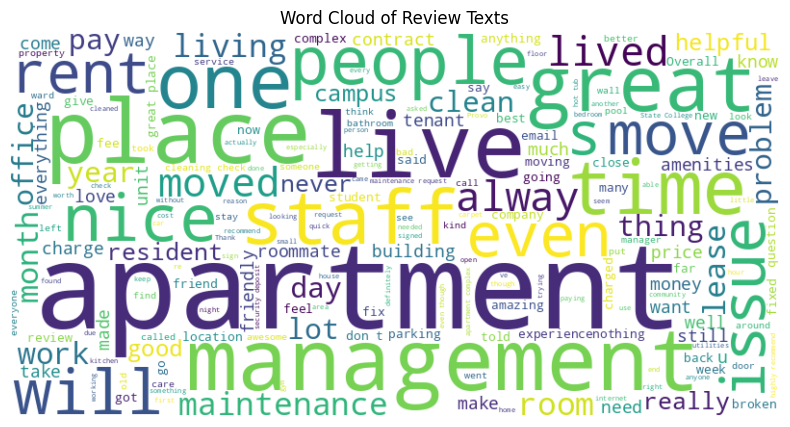

In [ ]:
# Combine all review texts
all_reviews_text = ' '.join(df_r_with_campus['review_text'].dropna())

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()


The code loads in the token and sentiment analysis results.

In [ ]:
# Load token list
df_tokens = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/tokens.csv.gz')

# Load sentiment analysis results
df_sentiments = pd.read_csv('https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/sentiments.csv')


The code processes the tokenized text in the DataFrames df_tokens by splitting the text into lists of words. It then calculates and visualizes the word frequency for both the original text and its lemmatized version.
The top 20 lemmatized words are plotted in a separate bar chart with a light coral color.
Both bar charts are displayed side by side. The x-axis represents words, and the y-axis represents the frequency of each word.

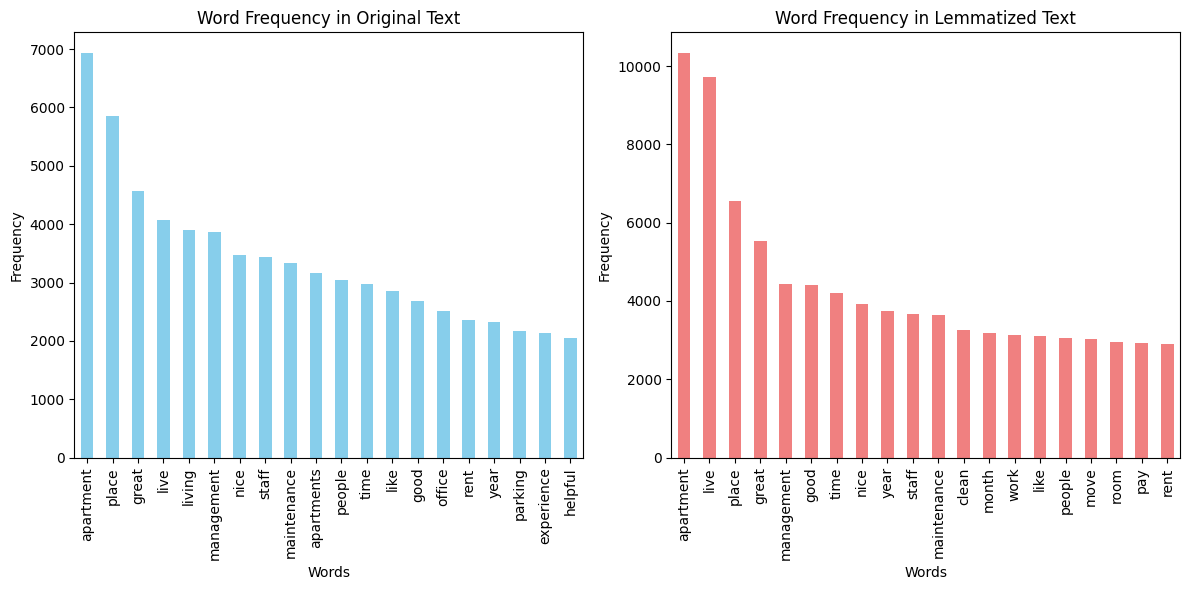

In [ ]:
df_tokens['text'] = df_tokens['text'].apply(lambda x: x.split())
word_frequencies_text = df_tokens['text'].explode().value_counts()

df_tokens['lemma'] = df_tokens['lemma'].apply(lambda x: x.split())
word_frequencies_lemma = df_tokens['lemma'].explode().value_counts()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for original text
plt.subplot(1, 2, 1)
word_frequencies_text[:20].plot(kind='bar', color='skyblue')
plt.title('Word Frequency in Original Text')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Plot for lemmatized text
plt.subplot(1, 2, 2)
word_frequencies_lemma[:20].plot(kind='bar', color='lightcoral')
plt.title('Word Frequency in Lemmatized Text')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The following code displays the frequency of the POS from the explain column

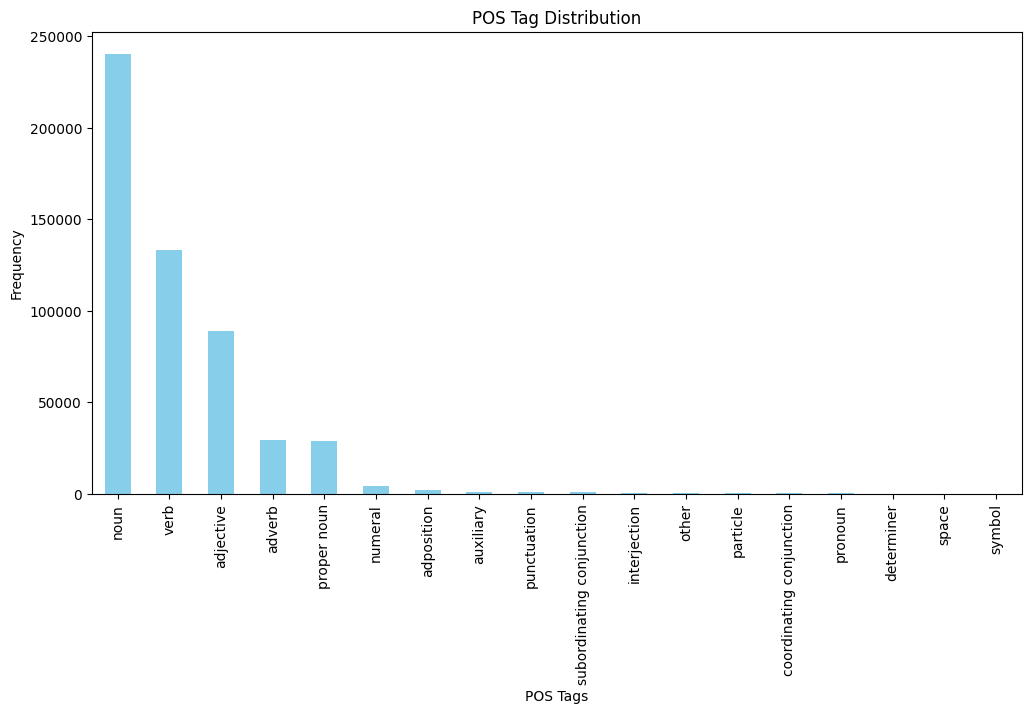

In [ ]:
# Assuming 'POS' is the column containing POS tags
pos_distribution = df_tokens['explain'].explode().value_counts()
pos_distribution.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('POS Tag Distribution')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.show()

The code merges the df for sentiment with the df for reviews with the campus value

In [ ]:
# Assuming 'review_id' is the common column in both DataFrames
merged_reviews = pd.merge(df_r_with_campus, df_sentiments, on='review_id', how='left')

# Display the merged DataFrame
print(merged_reviews.head())


                      place_id                             review_id  \
0  ChIJMStDGsrXDIgRyPNO_VtZBPk   ChZDSUhNMG9nS0VJQ0FnSUNKOXFyTkt3EAE   
1  ChIJMStDGsrXDIgRyPNO_VtZBPk  ChdDSUhNMG9nS0VJQ0FnSUNKOXJYbDRRRRAB   
2  ChIJMStDGsrXDIgRyPNO_VtZBPk   ChZDSUhNMG9nS0VJQ0FnSUNKeWYyMFZnEAE   
3  ChIJMStDGsrXDIgRyPNO_VtZBPk   ChZDSUhNMG9nS0VJQ0FnSUNKcWRLcElnEAE   
4  ChIJMStDGsrXDIgRyPNO_VtZBPk   ChZDSUhNMG9nS0VJQ0FnSUNKeWJPWWNBEAE   

    author_title              author_id  \
0    Holly Black  107453551701555172701   
1    Gerry Green  109032190359447956486   
2  Clayton Young  110919348229483854904   
3   Alyssa Jones  103734442778358105274   
4   Max Deremiah  111961032838400691649   

                                         review_text  review_rating  \
0  Stone Ridge Square is a fantastic housing opti...              5   
1  I have lived here at Stone Ridge for more than...              5   
2  Really happy we decided to move in to Stone Ri...              5   
3  I've been a resident 

This code shows the count of positive the the count of negative reviews using the sentiment labels.

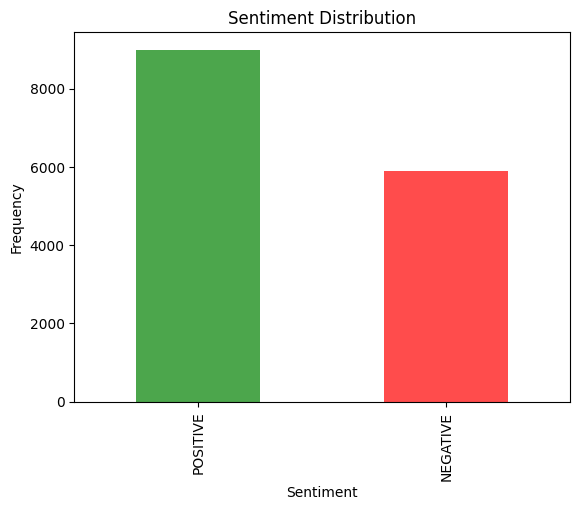

In [ ]:
sentiment_distribution = merged_reviews['sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


Using the year value from the review datetime, the following code graphs the average sentiment score over time by year.

<ipython-input-31-4e61e80021f2>:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



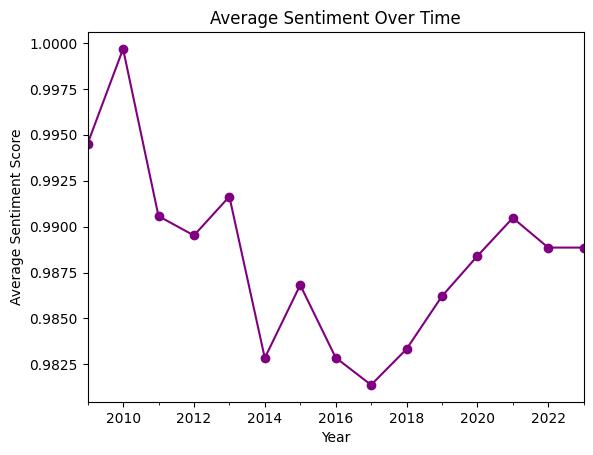

In [ ]:
# Assuming 'review_datetime_utc' is a datetime column
merged_reviews['review_datetime_utc'] = pd.to_datetime(merged_reviews['review_datetime_utc'])

# Extract month and year
merged_reviews['review_year'] = merged_reviews['review_datetime_utc'].dt.to_period('Y')

# Plot sentiment over time
average_sentiment_over_time = merged_reviews.groupby('review_year')['score'].mean()
average_sentiment_over_time.plot(kind='line', marker='o', color='purple')
plt.title('Average Sentiment Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.show()


The following code shows the distribution of sentiment scores. Most of the scores are very high.

In [ ]:
# Histogram of sentiment scores
fig_histogram_sentiment = px.histogram(merged_reviews, x='score', title='Distribution of Sentiment Scores')
fig_histogram_sentiment.show()


The following code shows the positive review count by campus by year.

<ipython-input-33-7e22c7cb3a50>:15: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




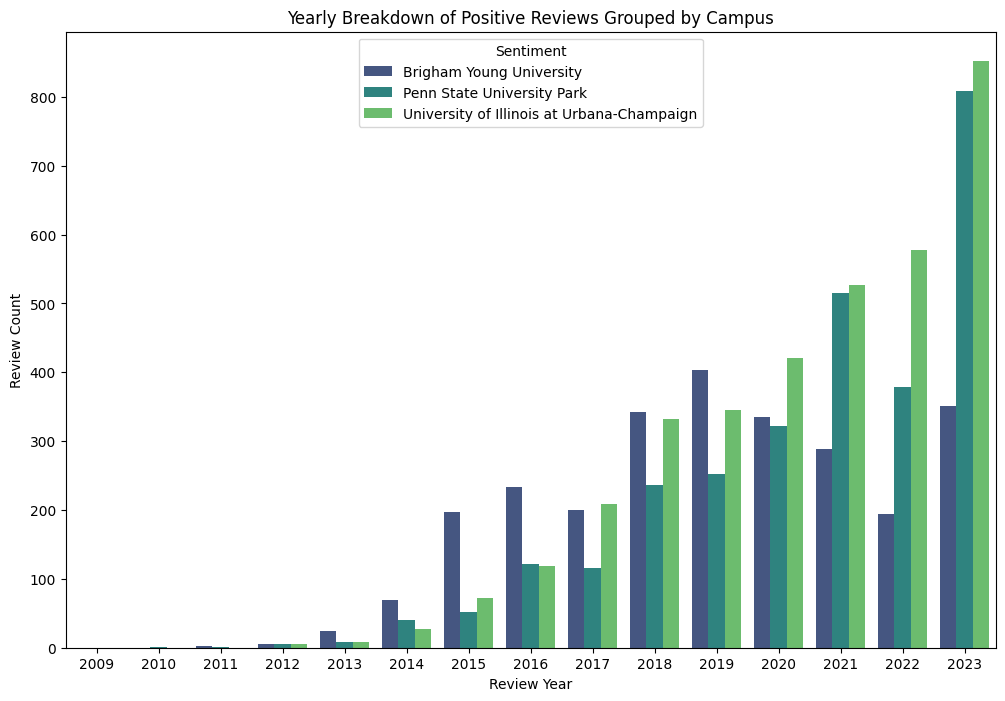

In [ ]:
# Filter positive and negative reviews
positive_reviews = merged_reviews[merged_reviews['sentiment'] == 'POSITIVE']

# Extract year from review date
merged_reviews['review_year'] = merged_reviews['review_datetime_utc'].dt.year

# Group by campus, review year, and sentiment, calculate the count
review_counts = merged_reviews.groupby(['campus', 'review_year', 'sentiment']).size().reset_index(name='count')

# Pivot the DataFrame to have sentiment as columns
review_counts_pivot = review_counts.pivot_table(index=['campus', 'review_year'], columns='sentiment', values='count', fill_value=0).reset_index()

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='review_year', y='POSITIVE', hue='campus', data=review_counts_pivot, palette='viridis', ci=None)
plt.title('Yearly Breakdown of Positive Reviews Grouped by Campus')
plt.xlabel('Review Year')
plt.ylabel('Review Count')
plt.legend(title='Sentiment')
plt.show()


The following code performs topic modeling using the review text and uses LDA.LDA outputs the distribution of topics for each document and the distribution of words for each topic

In [ ]:
# Assuming 'review_text' is the column containing review text
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(merged_reviews['review_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda.fit_transform(X)

# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: maintenance, nice, really, apartment, building, staff, like, great, room, living
Topic 2: great, place, live, staff, living, nice, love, amenities, campus, recommend
Topic 3: maintenance, apartment, staff, great, helpful, property, experience, questions, service, leasing
Topic 4: apartment, don, management, just, rent, place, moved, cleaning, time, month
Topic 5: parking, apartments, management, good, place, nice, great, people, apartment, really


There is some overlap but I tried to label the topics

Topic 1: Maintenance and Apartment Living

Topic 2: Positive Living Experiences

Topic 3: Positive Leasing Process

Topic 4: Neutral Aspects of Renting

Topic 5: Positive Managament Experiences


In exploring the dataset related to leasing company reviews in various campus towns, several intriguing insights have emerged. The analysis revealed distinct sentiment patterns across different campuses, with positive sentiments being dominant in many reviews. Additionally, the identification of key topics through text analysis shed light on common themes such as maintenance, positive living experiences, and challenges associated with renting and management. The distribution of review ratings over time showcased fluctuations, indicating potential shifts in sentiment or experiences across different years. Treemap visualizations highlighted the diversity of businesses across categories and campuses. Moreover, the word cloud provided a visual representation of frequently occurring words in the aggregated reviews, offering a glimpse into the most emphasized aspects of the leasing experience. These findings collectively contribute to a comprehensive understanding of the dynamics within campus towns, providing valuable insights for leasing companies and stakeholders in the housing industry.
Furthermore, the analysis of owner response rates by campus and category in Tableau underscored the importance of effective communication and engagement between leasing companies and residents. The boxplots of review likes by campus provided a nuanced view of user engagement, with variations in the popularity of reviews across different campuses. The examination of sentiment scores over time revealed positive trends in the overall sentiment trajectory, potentially linked to external factors or changes in leasing company practices for the better.